# **Лабораторная работа 1. Введение в машинное обучение. Обучение с учителем. Задача регрессии**

## Преобразование датасета

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("../data/regression/trip_duration_task.csv").drop_duplicates()
data

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
0,id1080784,2.0,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,400
1,id0889885,1.0,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,1100
2,id0857912,2.0,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,1635
3,id3744273,2.0,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,1141
4,id0232939,1.0,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,848
...,...,...,...,...,...,...,...,...,...,...
729317,id3905982,2.0,2016-05-21 13:29:38,2016-05-21 13:34:34,2,-73.965919,40.789780,-73.952637,40.789181,296
729318,id0102861,1.0,2016-02-22 00:43:11,2016-02-22 00:48:26,1,-73.996666,40.737434,-74.001320,40.731911,315
729319,id0439699,1.0,2016-04-15 18:56:48,2016-04-15 19:08:01,1,-73.997849,40.761696,-74.001488,40.741207,673
729320,id2078912,1.0,2016-06-19 09:50:47,2016-06-19 09:58:14,1,-74.006706,40.708244,-74.013550,40.713814,447


<Axes: xlabel='id'>

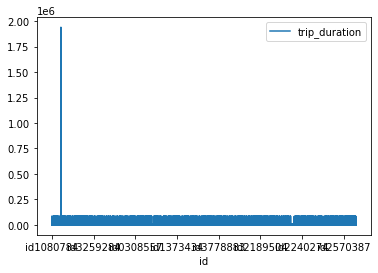

<Axes: xlabel='vendor_id'>

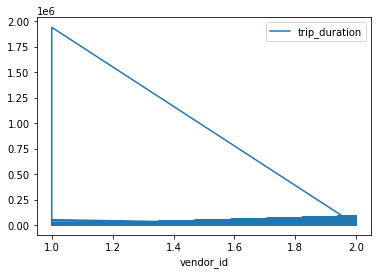

<Axes: xlabel='pickup_datetime'>

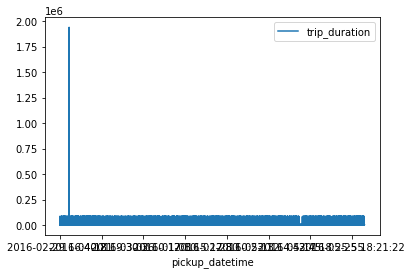

<Axes: xlabel='dropoff_datetime'>

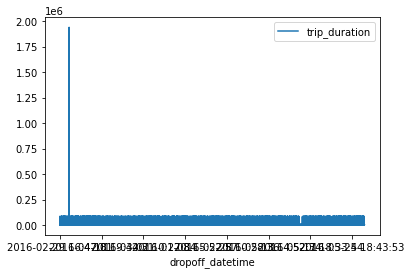

<Axes: xlabel='passenger_count'>

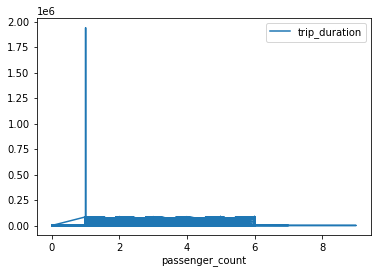

<Axes: xlabel='pickup_longitude'>

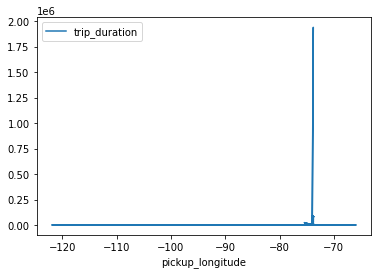

<Axes: xlabel='pickup_latitude'>

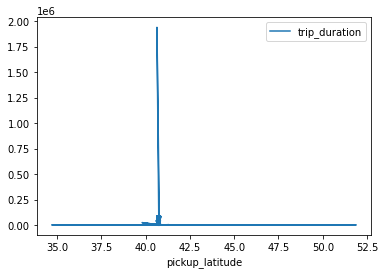

<Axes: xlabel='dropoff_longitude'>

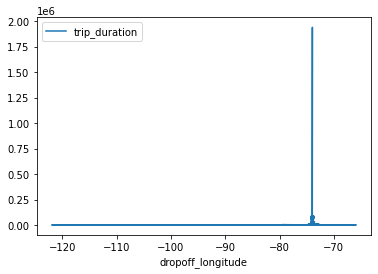

<Axes: xlabel='dropoff_latitude'>

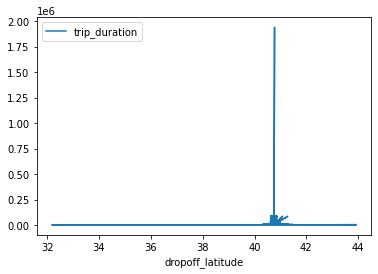

KeyError: ignored

In [ ]:
for column in data.columns:
  display(data.plot(column, data.columns[-1]))
  plt.show()

In [ ]:
data[data.columns].corr()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
vendor_id,1.000000,0.286484,0.008197,0.002799,0.002394,0.005215,0.027760
passenger_count,0.286484,1.000000,0.001163,-0.004676,-0.000027,-0.003944,0.013022
pickup_longitude,0.008197,0.001163,1.000000,0.047811,0.780647,0.118473,0.035447
pickup_latitude,0.002799,-0.004676,0.047811,1.000000,0.120090,0.479514,-0.038175
dropoff_longitude,0.002394,-0.000027,0.780647,0.120090,1.000000,0.149598,0.020664
dropoff_latitude,0.005215,-0.003944,0.118473,0.479514,0.149598,1.000000,-0.028283
trip_duration,0.027760,0.013022,0.035447,-0.038175,0.020664,-0.028283,1.000000


In [4]:
data = data.head(150000)
data = data.drop(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_longitude   150000 non-null  float64
 1   pickup_latitude    149584 non-null  float64
 2   dropoff_longitude  150000 non-null  float64
 3   dropoff_latitude   150000 non-null  float64
 4   trip_duration      150000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 6.9 MB


### Заполнение пустых строк

In [5]:
for column in list(data):
  if data[column].dtype == 'float64':
    valuesNotNAN = data[column].dropna()
    data[column] = data[column].fillna(round(sum(valuesNotNAN)/len(valuesNotNAN)))

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_longitude   150000 non-null  float64
 1   pickup_latitude    150000 non-null  float64
 2   dropoff_longitude  150000 non-null  float64
 3   dropoff_latitude   150000 non-null  float64
 4   trip_duration      150000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 6.9 MB


### Сохранение обработанного датасета

In [6]:
data.to_csv("../data/regression/trip_duration_update.csv")

 ### Выделение целевого признака и предикторов

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML/RegressionFirstLab/trip_duration_update.csv", index_col=0)

y = df["trip_duration"]
X = df.drop(["trip_duration"], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_longitude   150000 non-null  float64
 1   pickup_latitude    150000 non-null  float64
 2   dropoff_longitude  150000 non-null  float64
 3   dropoff_latitude   150000 non-null  float64
 4   trip_duration      150000 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 6.9 MB


In [ ]:
y

0          400
1         1100
2         1635
3         1141
4          848
          ... 
149995     690
149996     753
149997     804
149998     599
149999     429
Name: trip_duration, Length: 150000, dtype: int64

In [ ]:
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.953918,40.778873,-73.963875,40.771164
1,-73.988312,40.731743,-73.994751,40.694931
2,-73.997314,40.721458,-73.948029,40.774918
3,-73.961670,40.759720,-73.956779,40.780628
4,-74.017120,40.708469,-73.988182,40.740631
...,...,...,...,...
149995,-73.980270,40.775326,-73.962090,40.763794
149996,-73.981804,40.769016,-73.979767,40.780998
149997,-73.989838,40.714241,-73.988083,40.745743
149998,-73.989395,40.726200,-74.001060,40.721779


### Разделение данных на обучающую и тестовую выборки

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((120000, 4), (120000,), (30000, 4), (30000,))

## **Линейная регрессия**

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

lr = LinearRegression().fit(X_train, y_train)
lr.predict(X_test)

list(zip(X.columns, lr.coef_))

[('pickup_longitude', 7028.11021859996),
 ('pickup_latitude', -4655.401722867282),
 ('dropoff_longitude', 3048.8097650226687),
 ('dropoff_latitude', -2608.0364785766897)]

# Метрики качества

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

y_pred = lr.predict(X_test)

print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lr.score(X_test, y_test)}')

MAE: 569.1468113971456
MSE: 9589939.797294984
RMSE: 3096.7627931914617
MAPE: 1.2478428759892455
R^2: 0.00894124411387609


In [ ]:
len(lr.coef_)
lr.coef_

array([ 7028.1102186 , -4655.40172287,  3048.80976502, -2608.03647858])

# Регуляризация в линейной регрессии (L1 Lasso)

In [ ]:
# L1
lasso = Lasso(alpha=0.5).fit(X_train, y_train)
y_pred = lasso.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {lasso.score(X_test, y_test)}')
lasso.coef_

MAE: 570.041429299614
MSE: 9588692.898358248
RMSE: 3096.561463681651
MAPE: 1.2462197880950712
R^2: 0.009070103119779849


array([ 6807.9443844 , -4329.59407074,  2672.34769067, -2188.05173722])

# Регуляризация в линейной регрессии (L2 Ridge)

In [ ]:
# L2
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import numpy as np

parameters = {'alpha': np.arange(0, 1, 0.1)}
ridge_optimal = GridSearchCV(Ridge(), parameters).fit(X_train, y_train)
ridge_optimal.best_params_

ridge = Ridge(alpha=ridge_optimal.best_params_["alpha"]).fit(X_train, y_train)
y_pred = ridge.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred))}')
print(f'R^2: {ridge.score(X_test, y_test)}')

ridge.coef_

MAE: 569.1305772608195
MSE: 9589679.093938375
RMSE: 3096.7207000209714
MAPE: 1.2476907270602955
R^2: 0.008968186133296085


array([ 6997.86240215, -4629.02396481,  3037.92387984, -2596.30371295])

# **Полиномиальная регрессия**

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(2)  

X_train_p = pf.fit_transform(X_train)
X_test_p = pf.fit_transform(X_test)

In [ ]:
lr2 = LinearRegression().fit(X_train_p, y_train)
lr2.coef_

array([       0.        ,  2606366.25039678,  3233409.71571254,
       -4392282.38343185,   464795.94199358,    88903.65752891,
          26639.81712725,  -108311.34129785,    35545.02373849,
          17345.70909112,   -22244.9233447 ,  -106103.93200454,
          12630.91350037,   -20653.75235162,    60844.76575216])

# Метрики качества

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from math import sqrt

y_pred_pf = lr2.predict(X_test_p)
print(f'MAE: {mean_absolute_error(y_test, y_pred_pf)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_pf)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_pf))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred_pf))}')
print(f'R^2: {r2_score(y_test, y_pred_pf)}')

MAE: 506.44163994506397
MSE: 9461348.424083903
RMSE: 3075.9304972778405
MAPE: 1.1005761130232636
R^2: 0.022230337585370852


## Регуляризации

In [ ]:
ridge_pf = Ridge(alpha=0.7).fit(X_train_p, y_train)
y_pred_pf = ridge_pf.predict(X_test_p)
print(f'MAE: {mean_absolute_error(y_test, y_pred_pf)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_pf)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_pf))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred_pf))}')
print(f'R^2: {r2_score(y_test, y_pred_pf)}')

MAE: 537.9560988982308
MSE: 9506672.105443485
RMSE: 3083.2891699358147
MAPE: 1.1862402969907908
R^2: 0.017546425881037053


In [ ]:
lasso_pf = Lasso(alpha=0.9).fit(X_train_p, y_train)
y_pred_pf = lasso_pf.predict(X_test_p)
print(f'MAE: {mean_absolute_error(y_test, y_pred_pf)}')
print(f'MSE: {mean_squared_error(y_test, y_pred_pf)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test, y_pred_pf))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test, y_pred_pf))}')
print(f'R^2: {r2_score(y_test, y_pred_pf)}')

MAE: 569.1250348863509
MSE: 9589828.344591439
RMSE: 3096.7447981051714
MAPE: 1.2478192967341597
R^2: 0.008952762035786876


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.924e+10, tolerance: 4.890e+08
  model = cd_fast.enet_coordinate_descent(


# **Собственная реализация**

### **Класс линейной регрессии**

In [ ]:
class MyLR:
    def __init__( self, learning_rate = 0.0001, iterations = 1000) :
        self.learning_rate = learning_rate        
        self.iterations = iterations        

    def transform_(self, x):
        return np.concatenate((np.ones((len(x), 1)), x), axis = 1)

    def loss_func(self, x, y, w):
        return sum((y - np.dot(x, w)) ** 2)/x.shape[0]

    def fit(self, x, y):
        dist = np.inf
        eps = 1e-20
        X = self.transform_(x)

        w = np.zeros(X.shape[1])
        iter = 0

        while iter <= self.iterations:
            loss = self.loss_func(X, y, w)
            w = w - self.learning_rate * 2 * np.dot(X.T, np.dot(X, w) - y) /X.shape[0]
            dist = np.abs(loss - self.loss_func(X, y, w))
            iter += 1
            
            if(dist <= eps):
                break
        print(iter)

        self.w = w
        return self
        

    def predict(self, x):
        return np.dot(self.transform_(x), self.w)

### **Регуляризация L2**

In [ ]:
class MyRidge:
    def __init__( self, learning_rate, iterations, alpha ) :
        self.learning_rate = learning_rate        
        self.iterations = iterations        
        self.alpha = alpha

    def transform_(self, x):
        return np.concatenate((np.ones((len(x), 1)), x), axis = 1)

    def loss_func(self, x, y, w):
        return sum(y - np.dot(x, w)) ** 2  + self.alpha * (np.matmul(w, w))/X.shape[0]

    def fit(self, x, y):
        dist = np.inf
        eps = 1e-20
        X = self.transform_(x)

        w = np.zeros(X.shape[1])
        iter = 0

        while iter <= self.iterations:
            loss = self.loss_func(X, y, w)
            w = w - ((self.learning_rate * 2 * np.dot(X.T, np.dot(X, w) - y)) + ( 2 * self.alpha * w ))/X.shape[0]
            dist = np.abs(loss - self.loss_func(X, y, w))
            iter += 1
            
            if(dist <= eps):
                break
        print(iter)
        self.w = w
        return self
        

    def predict(self, x):
        return np.dot(self.transform_(x), self.w)

### **Метрики**

In [ ]:
class Metrics:
    def  mean_absolute_error(y_test, y_pred):
        y_true, predictions = np.array(y_test), np.array(y_pred)
        return float(np.mean(np.abs(y_true-predictions)))
    def mean_squared_error(y_test, y_pred):
        y_true, predictions = np.array(y_test), np.array(y_pred)
        return float(np.mean((y_true-predictions)**2))
    def root_mean_squared_error(y_test, y_pred):
        return float(np.sqrt(Metrics.mean_squared_error(y_test, y_pred)))
    def mean_absolute_percentage_error(y_test, y_pred):
        y_true, predictions = np.array(y_test), np.array(y_pred)
        return float(np.mean(np.abs((y_true-predictions)/y_true)))
    def r_2_score( y_test, y_pred):
        y_true, predictions = np.array(y_test), np.array(y_pred)
        mean_value = np.mean(y_test)
        return float(1 - np.sum((y_true - predictions)**2)/ np.sum((y_true - mean_value)**2))

In [1]:
df = pd.read_csv("../data/regression/trip_duration_task.csv", index_col=0)
df = df.head(150000)
df.info()

NameError: name 'pd' is not defined

In [ ]:
y = df['trip_duration']
X = df.drop(['trip_duration'], axis=1)

In [ ]:
y

0          400
1         1100
2         1635
3         1141
4          848
          ... 
149995     690
149996     753
149997     804
149998     599
149999     429
Name: trip_duration, Length: 150000, dtype: int64

In [ ]:
X

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,-73.953918,40.778873,-73.963875,40.771164
1,-73.988312,40.731743,-73.994751,40.694931
2,-73.997314,40.721458,-73.948029,40.774918
3,-73.961670,40.759720,-73.956779,40.780628
4,-74.017120,40.708469,-73.988182,40.740631
...,...,...,...,...
149995,-73.980270,40.775326,-73.962090,40.763794
149996,-73.981804,40.769016,-73.979767,40.780998
149997,-73.989838,40.714241,-73.988083,40.745743
149998,-73.989395,40.726200,-74.001060,40.721779


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train_std = pd.DataFrame(standardScaler.transform(X_train), columns=X.columns)
X_test_std = pd.DataFrame(standardScaler.transform(X_test), columns=X.columns)
X_train_std.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,1.200000e+05,1.200000e+05,1.200000e+05,1.200000e+05
mean,-8.163870e-14,7.883791e-14,-2.204104e-15,2.793315e-14
std,1.000004e+00,1.000004e+00,1.000004e+00,1.000004e+00
min,-7.103759e+00,-9.239030e+00,-1.713658e+01,-1.271665e+01
25%,-4.791927e-01,-4.570740e-01,-4.881567e-01,-4.915789e-01
50%,-2.173671e-01,8.400381e-02,-1.761689e-01,7.996780e-02
75%,1.541987e-01,5.436469e-01,2.759119e-01,5.534075e-01
max,1.450550e+01,1.748350e+01,3.438235e+01,1.724123e+01


In [ ]:
myLinearRegression = MyLR()
model = myLinearRegression.fit(X_train_std, y_train)
y_pred = myLinearRegression.predict(X_test_std)
print(f'MAE: {Metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {Metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {Metrics.root_mean_squared_error(y_test, y_pred)}')
print(f'MAPE: {Metrics.mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {Metrics.r_2_score(y_test, y_pred):.7f}')

1001
MAE: 771.2944716849088
MSE: 9354221.033089392
RMSE: 3058.467105118084
MAPE: 0.8081303833041992
R^2: -0.0613965


In [ ]:
ridge = MyRidge(0.01, 1000, 0.9)
model = ridge.fit(X_train_std, y_train)
y_pred = ridge.predict(X_test_std)
print(f'MAE: {Metrics.mean_absolute_error(y_test, y_pred)}')
print(f'MSE: {Metrics.mean_squared_error(y_test, y_pred)}')
print(f'RMSE: {Metrics.root_mean_squared_error(y_test, y_pred)}')
print(f'MAPE: {Metrics.mean_absolute_percentage_error(y_test, y_pred)}')
print(f'R^2: {Metrics.r_2_score(y_test, y_pred):.7f}')

1001
MAE: 617.8074057818067
MSE: 9676994.129208172
RMSE: 3110.7867379825593
MAPE: 1.5147299673161336
R^2: -0.0000553
